In [ ]:
!pip install tensorflow
!pip install matplotlib

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

#### Dataset do keras - Fashion Mnist 
https://github.com/zalandoresearch/fashion-mnist

In [2]:
dataset = keras.datasets.fashion_mnist
((image_train, label_train),(image_validation, label_validation)) = dataset.load_data()

#### Validando o carregamento dos dados nas variáveis criadas

In [3]:
print('---------------')
print('Train - Image')
print('---------------')
print(type(image_train))
print(len(image_train))
print(image_train.shape)
print('---------------')
print('Train - Label')
print('---------------')
print(len(label_train))
print(type(label_train))
print(label_train.shape)

---------------
Train - Image
---------------
<class 'numpy.ndarray'>
60000
(60000, 28, 28)
---------------
Train - Label
---------------
60000
<class 'numpy.ndarray'>
(60000,)


In [4]:
print('---------------')
print('Validation - Image')
print('---------------')

print(type(image_validation))
print(len(image_validation))
print(image_validation.shape)

print('---------------')
print('Validation - Label')
print('---------------')

print(type(label_validation))
print(len(label_validation))
print(label_validation.shape)

---------------
Validation - Image
---------------
<class 'numpy.ndarray'>
10000
(10000, 28, 28)
---------------
Validation - Label
---------------
<class 'numpy.ndarray'>
10000
(10000,)


#### Classificação conforme documentação

In [5]:
classification = 10
label_classification = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### Visualizando as imagens

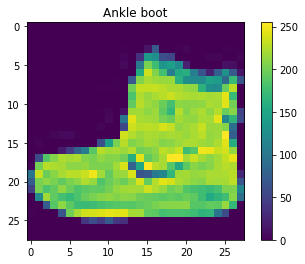

In [6]:
plt.imshow(image_train[0])
plt.title(label_classification[label_train[0]])
plt.colorbar()

In [7]:
set(label_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

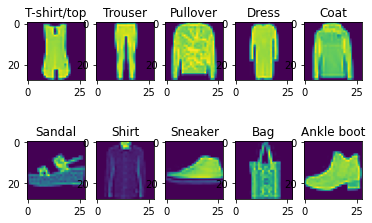

In [8]:
for image in range(classification):
    plt.subplot(2, 5,image+1)
    index = np.where(label_train == image)
    i = index[0][2]
    plt.imshow(image_train[i])
    plt.title(label_classification[label_train[i]])

#### Modelagem da rede neural

In [9]:
#Normalização das imagens
#O ponto flutuante vai nos permitir trabalhar com uma escala de 0 a 1 sem perder as escalas de cor da imagem
image_train = image_train/float(255)
image_validation = image_validation/float(255)

In [10]:
#Arquitetura do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Shape da imagem recebida
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [11]:
#Compilando o modelo
adam = keras.optimizers.Adam(learning_rate=0.002)

# early_stopping = [keras.callbacks.EarlyStopping(monitor='accuracy'),
#                  keras.callbacks.ModelCheckpoint(filepath='models/best_model.hdf5',
#                  monitor='accuracy', save_best_only=True)]

model.compile(optimizer=adam,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
#Treinando o modelo
history = model.fit(image_train, label_train, batch_size = 50, epochs=8, validation_split=0.2)

Epoch 1/8
960/960 [==============================] - 3s 3ms/step - loss: 0.6118 - accuracy: 0.7790 - val_loss: 0.4730 - val_accuracy: 0.8181
Epoch 2/8
960/960 [==============================] - 2s 3ms/step - loss: 0.4592 - accuracy: 0.8374 - val_loss: 0.4112 - val_accuracy: 0.8566
Epoch 3/8
960/960 [==============================] - 2s 3ms/step - loss: 0.4201 - accuracy: 0.8495 - val_loss: 0.4046 - val_accuracy: 0.8484
Epoch 4/8
960/960 [==============================] - 2s 3ms/step - loss: 0.3971 - accuracy: 0.8571 - val_loss: 0.3646 - val_accuracy: 0.8670
Epoch 5/8
960/960 [==============================] - 2s 3ms/step - loss: 0.3808 - accuracy: 0.8616 - val_loss: 0.3665 - val_accuracy: 0.8704
Epoch 6/8
960/960 [==============================] - 3s 3ms/step - loss: 0.3706 - accuracy: 0.8664 - val_loss: 0.3641 - val_accuracy: 0.8710
Epoch 7/8
960/960 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8705 - val_loss: 0.3763 - val_accuracy: 0.8647
Epoch 8/8
960

#### Sumário do modelo

In [13]:
sumary = model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6

#### Salvando o modelo

In [14]:
model.save('models/model.h5')

#### Carregando o modelo

In [15]:
load = load_model('models/model.h5')

#### Validação de desempenho do modelo

##### Acurácia por época

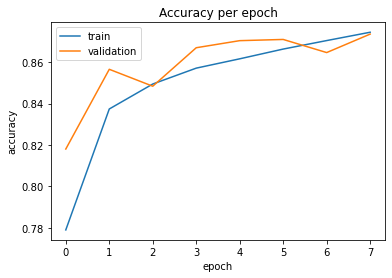

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])

##### Perda por época

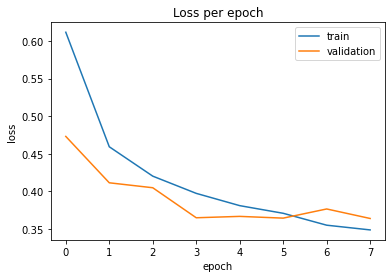

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])

### Testes do modelo

In [18]:
test = model.predict(image_validation)
print('Result model:', np.argmax(test[200]), end='')
print(' - Image label:', label_validation[200])
if np.argmax(test[200]) == label_validation[200]:
    print('--------------------------------')
    print('Model got it right! :D')
    print('--------------------------------')
else:
    print('--------------------------------')
    print('Model was wrong. :(')
    print('--------------------------------')

Result model: 1 - Image label: 1
--------------------------------
Model got it right! :D
--------------------------------


#### Encontrando erro

In [ ]:
error = []
validation_shape = 10000
while image in range(validation_shape):
    if image < validation_shape:
        result = model.predict(image_validation)
        image += 1
        if np.argmax(result[image]) != label_validation[image]:
            error.append(image)
    else:
        continue
print(error)

#### Identificando onde há maior erro

In [ ]:
error_qtty = len(error)
class_0 = error.count(0)
class_1 = error.count(1)
class_2 = error.count(2)
class_3 = error.count(3)
class_4 = error.count(4)
class_5 = error.count(5)
class_6 = error.count(6)
class_7 = error.count(7)
class_8 = error.count(8)
class_9 = error.count(9)

error_qtty_list = []
error_qtty_list.append(class_0)
error_qtty_list.append(class_1)
error_qtty_list.append(class_2)
error_qtty_list.append(class_3)
error_qtty_list.append(class_4)
error_qtty_list.append(class_5)
error_qtty_list.append(class_6)
error_qtty_list.append(class_7)
error_qtty_list.append(class_8)
error_qtty_list.append(class_9)

#### Avaliação do modelo

In [ ]:
loss_validation, accuracy_validation = model.evaluate(image_validation, label_validation)
print('Loss validation:', loss_validation)
print('Accuracy validation:', accuracy_validation)